# PART 5 Project: Communticating Data Findings

This notebook will be for the exploratory data analysis of this project. I will be using the Ford GoBike System Data.

## Data Wrangling

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

### Gathering

In [2]:
#Importing Dataset into Notebook
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing

In [3]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### First Impressions
We have 16 variables and 183,412 entries in this dataset. At first glance, we can see the following:
* `start_time` and `end_time` are the wrong data type - this should be datetime rather than object
* `start_station_id` and `end_station_id` should not be floats - these can be amended to integers, however these represent locations (meaning that no numerical operations will be applied to these) they can be converted to objects.
* `member_birth_year` should be a integer
* `member_gender`, `bike_share_for_all_trip` and `user_type` should be category
* There are null values in the following columns:
    - `start_station_id` and `start_station_name`
    - `end_station_id` and `end_station_name`
    - `member_birth_year` and `member_gender`
* Following columns aren't relevant to analysis:
    - `start_station_latitude` and `start_station_longitude`
    - `end_station_latitude` and `end_station_longitude`

In [8]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [39]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [4]:
#Prior to cleaning, creating copy of dataframe
df_clean = df.copy()

### Cleaning
Now will try to clean the above issues.

#### #1 - Removing irrelevant columns

**Define** 

Remove all columns associated with longitude and latitude.

**Code**

In [5]:
df_clean = df_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1)

**Test**

In [7]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

#### #2 - Converting to DateTime

**Define**

Convert `start_time` and `end_time` to DateTime format

**Code**

In [9]:
df_clean['start_time'] = pd.to_datetime(df_clean.start_time)

In [10]:
df_clean['end_time']=pd.to_datetime(df_clean.end_time)

**Test**

In [11]:
print(df_clean.start_time.dtype,df_clean.end_time.dtype)

datetime64[ns] datetime64[ns]


#### #3 - Dropping Null Values

**Define**

Drop Null Values.

**Code**

In [23]:
df_clean=df_clean.dropna()

**Test**

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

#### #4 - Convert to Categorical

**Define** 

Convert `member_gender`, `bike_share_for_all_trip` and `user_type` to categorical variables

**Code**

In [25]:
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [26]:
df_clean['bike_share_for_all_trip']=df_clean['bike_share_for_all_trip'].astype('category')

In [27]:
df_clean['user_type']=df_clean['user_type'].astype('category')

**Test**

In [30]:
print(df_clean['member_gender'].dtype,df_clean['bike_share_for_all_trip'].dtype,df_clean['user_type'].dtype)

category category category


In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), 

#### #5 - Convert to Integer

**Define**

Convert `member_birth_year` to integer

**Code**

In [32]:
df_clean['member_birth_year']=df_clean['member_birth_year'].astype(int)

**Test**

In [33]:
df_clean['member_birth_year'].dtype

dtype('int64')

In [34]:
df_clean['member_birth_year'].head()

0    1984
2    1972
3    1989
4    1974
5    1959
Name: member_birth_year, dtype: int64

#### #6 - Converting Station IDs

**Define**

Convert `start_station_id` and `end_station_id` to object

**Code**

In [35]:
df_clean['start_station_id']=df_clean['start_station_id'].astype(int)
df_clean['start_station_id']=df_clean['start_station_id'].astype(str)

In [36]:
df_clean['end_station_id']=df_clean['end_station_id'].astype(int)
df_clean['end_station_id']=df_clean['end_station_id'].astype(str)

**Test**

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), 

## Store Data

In [38]:
df_clean.to_csv('ford_gobike_master.csv', index = False)

## Analysis

#### What is the structure of your data?
> Prior to cleaning, there were 183,412 Ford GoBike trips recorded from February 2019 with 16 different factors. 4 factors were dropped (relating to Longitude and Latitude) as we had station name columns which would hold a similar role. Most of these factors were either object or floats which now have been amended in the previous part.

> We now have 174,952 trips (null entries were removed) and 12 factors: trip duration (seconds), start time, end time, start location (id and name), end location (id and name), bike id, type of user (Subscriber or One-off Customer), Birth year of member, Member Gender and whether or not they are part of the Bike Share progamme.

#### What is/are the main feature(s) of interest in your dataset?
I am trying to see if some of the factors affect the duration of the trip.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect age and gender to have an effect on the duration and potentially what type of user the individual is (one-off customer or subscriber).

### Univariate Exploration

To begin, I will look at the distribution of trip duration.

In [43]:
#Making copy of df_clean
bikes=df_clean.copy()
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,No


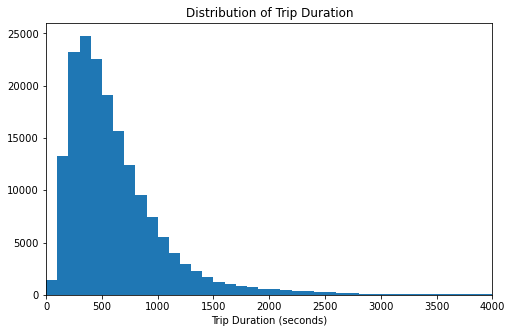

In [50]:
# start with standard-scaled plot
binsize = 100
bins = np.arange(0, bikes['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xlim(0, 4000)
plt.xlabel('Trip Duration (seconds)')
plt.title('Distribution of Trip Duration');

Here we can see that it is right-skewed with a long tail (here we set a limit of 4000, but duration does go beyond this). I will create a new variable `duration_min` as it is more convenient to measure duration in minutes than seconds.

In [51]:
bikes['duration_min']=df['duration_sec']/60

In [53]:
bikes['duration_min'].head()

0     869.750000
2    1030.900000
3     608.166667
4      26.416667
5      29.883333
Name: duration_min, dtype: float64

In [56]:
bikes['duration_min'].max()

1409.1333333333334

Plot the same as the above but using `duration_min`.

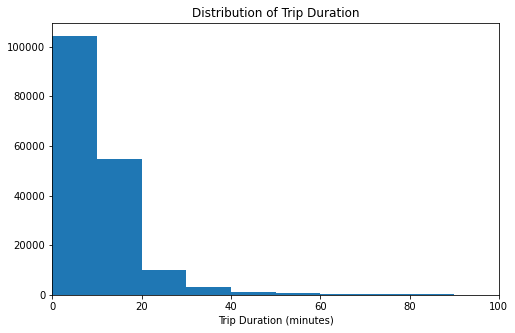

In [61]:
binsize = 10
bins = np.arange(0, bikes['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_min', bins = bins)
plt.xlim(0, 100)
plt.xlabel('Trip Duration (minutes)')
plt.title('Distribution of Trip Duration');

Similarly, it is right-skewed and has a really long tail (here the limit is 100 minutes, however the max value is 1409 minutes). Will plot this again but transforming to a log scale.

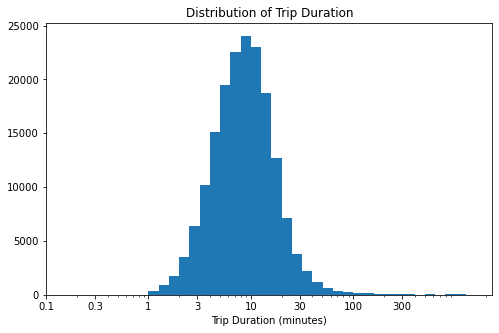

In [64]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(bikes['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (minutes)')
plt.title('Distribution of Trip Duration');


Most of the trips are concerntrated on the area with shorter trips with a few on the longer end. By plotting on a log scale, we can see that the data is uni-modal at around 10 minutes. 

Next up, the first predictor variable of interest: gender.

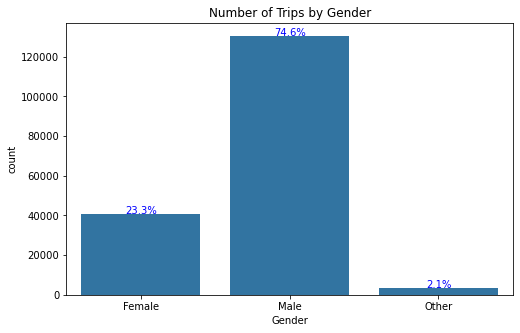

In [69]:
#bar plot of Gender
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_gender', color = base_color)
plt.title('Number of Trips by Gender')
plt.xlabel('Gender')

n_points = bikes.shape[0]
gender_counts = bikes['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()


There have been a lot more rides done by Men than Women or other. Nearly 75% of Users where Male whereas Female only accounted for 23.3% of trips.

Next up: User Types.

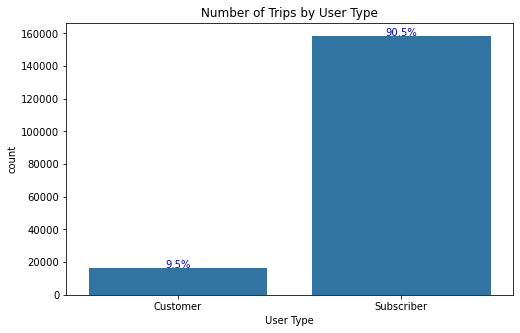

In [71]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'user_type', color = base_color)
plt.title('Number of Trips by User Type')
plt.xlabel('User Type')

n_points = bikes.shape[0]
user_counts = bikes['user_type'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()



A lot more Subscribers use the service that one-off customers (90.5% vs 9.5%).

Lastly, I will look at Age.

In [72]:
#Calculate Age
bikes['age']=2019 - bikes['member_birth_year']
bikes['age'].head()

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

In [73]:
#Split into groups as this may make it easier
age_bins = [0, 19, 29, 39, 49, 59,
            69, 79, 89, 99]
age_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59',
              '60 - 69', '70 - 79', '80 - 89', '90 - 99']

bikes['age_group'] = pd.cut(bikes['age'], bins = age_bins, labels = age_labels, right = False)

In [74]:
bikes.age_group.head()

0    30 - 39
2    40 - 49
3    30 - 39
4    40 - 49
5    60 - 69
Name: age_group, dtype: category
Categories (9, object): ['10 - 19' < '20 - 29' < '30 - 39' < '40 - 49' ... '60 - 69' < '70 - 79' < '80 - 89' < '90 - 99']

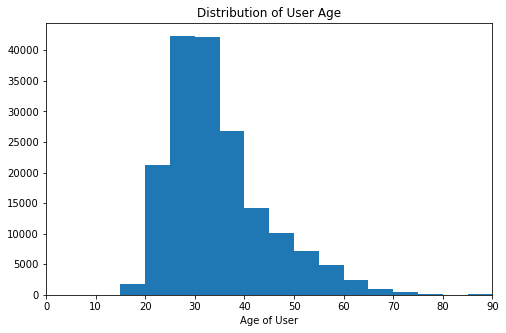

In [78]:
binsize = 5
bins = np.arange(0, bikes['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'age', bins = bins)
plt.xlim(0, 90)
plt.xlabel('Age of User')
plt.title('Distribution of User Age');

Here we can see that the distribution of Age is right-skewed with the peak at around the age of 30. As age increases the number of users decreases.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Both duration variables (`duration_sec` and `duration_min`) had large ranges, so I transformed to log scale. Under the the log scale, we could see that the data was unimodal at around 10 minutes.


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had created a new variable called `duration_min` as it seemed unlikely that an individal would use a bike for seconds. I had also created `age` using `member_birth_year`.

### Bivariate Exploration

Now let's look at bivariate explorations.

In [79]:
numeric_vars = ['duration_min', 'age']
categoric_vars = ['user_type', 'member_gender']

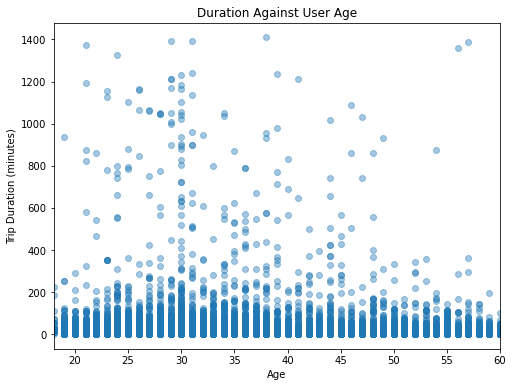

In [83]:
# scatter plot of duration vs. age
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'age', y = 'duration_min', alpha = 0.4)
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Duration (minutes)')
plt.title('Duration Against User Age');


It looks as though users with age between 26 and 37 have the highest trip duration. We can see that as the user get older, the trip duration becomes shorter.

Next, I will look at duration and user type.

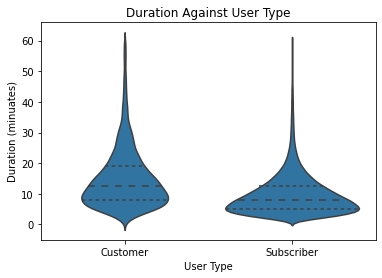

In [90]:
#will take a subset of the data where duaration was less than an hour.
bikes_sub=bikes.query("duration_min < 60")
base_color = sb.color_palette()[0]
sb.violinplot(data=bikes_sub, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (minuates)')
plt.title('Duration Against User Type');

In [96]:
bikes_sub.groupby('user_type')['duration_min'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,15864.0,14.994809,9.748634,1.033333,8.116667,12.583333,19.100000,59.916667
Subscriber,157702.0,9.836926,6.943783,1.016667,5.183333,8.133333,12.433333,59.933333


From the above Violin Plot, we can see that subscribers tend to ride the bikes for a shorter duration than one-off customers. This could be due to a variety of reasons such as subscribers using the bikes on a more regular basis (for example, commuting to work), however one-off customers could be tourists who would use the bikes for exploring the town.

Lastly, I will look at duration against gender.


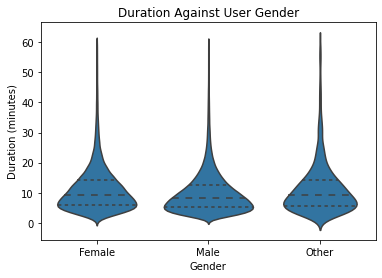

In [91]:
base_color = sb.color_palette()[0]
sb.violinplot(data=bikes_sub, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.title('Duration Against User Gender');

In [95]:
bikes_sub.groupby('member_gender')['duration_min'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40419.0,11.257165,7.778044,1.016667,5.983333,9.383333,14.200000,59.683333
Male,129574.0,9.981418,7.200161,1.016667,5.166667,8.166667,12.566667,59.916667
Other,3573.0,11.431561,8.813041,1.050000,5.683333,9.066667,14.166667,59.933333


We know from univariate analysis that 75% of users were male, however from the above Violin plot we can see that there isn't much of a difference between duration of trips. All three plots look very similar, with the median trip being around 10 minutes.

Text(0.5, 1.0, 'Age against User Type')

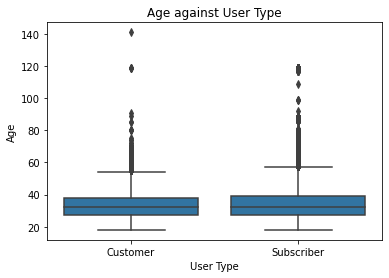

In [99]:
sb.boxplot(data=bikes, x='user_type',y='age',color=base_color)
plt.xlabel('User Type')
plt.ylabel('Age')
plt.title('Age against User Type')

In [100]:
bikes.groupby('user_type')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,16566.0,33.648618,9.486138,18.0,27.0,32.0,38.0,141.0
Subscriber,158386.0,34.254208,10.180949,18.0,27.0,32.0,39.0,119.0


#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was interesting to see that Gender did not affect the length of the trip. From the above summary statistics, we can see how close the values are as on the Violin plot there was no huge visual difference. 

In addition, we could see that a user who subscribes to the GoBike service on average takes shorter journeys than one-off customers. However as the subscriber user is more regular then the customer user is more likely to be affected by random trips.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Looking at Age and type of User, we can see that there is not a significant difference between a subscriber and one-off customer. 

### Multivariate Exploration

For this part I will look to see if there is a difference between trip duration against age and gender.

In [101]:
bikes.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [107]:
bikes.age.value_counts().tail(50)

43     2435
46     2080
51     1927
48     1924
47     1909
19     1675
49     1590
54     1546
50     1414
52     1315
55     1189
56     1151
53      989
57      955
58      821
62      807
59      806
60      624
61      517
63      392
65      301
67      189
68      180
69      178
66      158
72      135
64      134
74      105
70       99
88       89
119      53
71       51
18       34
76       30
77       21
86       20
73       19
80       11
117      11
78        9
118       6
99        3
81        3
85        2
75        2
92        1
91        1
109       1
89        1
141       1
Name: age, dtype: int64

Most of the users are between the ages of 18 and 56. I will take a subset of the data only including those between 18 and 60.

In [108]:
#taking a subset
bikes_age = bikes_sub[bikes_sub['age']<=60]

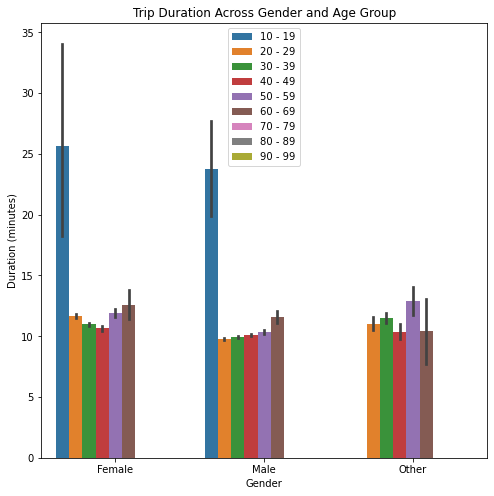

In [112]:
plt.figure(figsize = [8, 8])
ax = sb.barplot(x='member_gender', y = 'duration_min', hue='age_group', data=bikes_age.sort_values(by= 'age_group'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
leg = ax.legend()

Text(0, 0.5, 'Duration (minutes)')

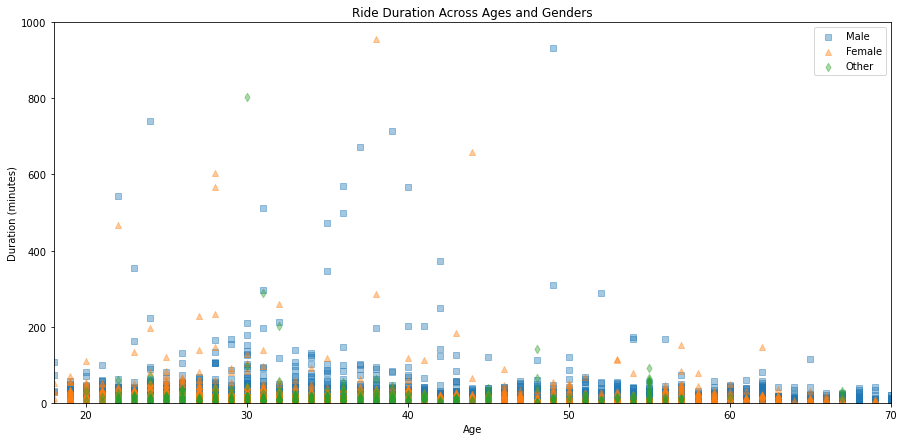

In [120]:
sample = bikes.sample(25000)

plt.figure(figsize = (15,7))

cat_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'd']]

for cat, marker in cat_markers:
    df_gender = sample[sample['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_min', marker = marker, alpha = .4);
plt.legend(['Male', 'Female', 'Other'])
plt.xlim(18, 70);
plt.ylim(0, 1000);
plt.title('Ride Duration Across Ages and Genders');
plt.xlabel('Age');
plt.ylabel('Duration (minutes)')

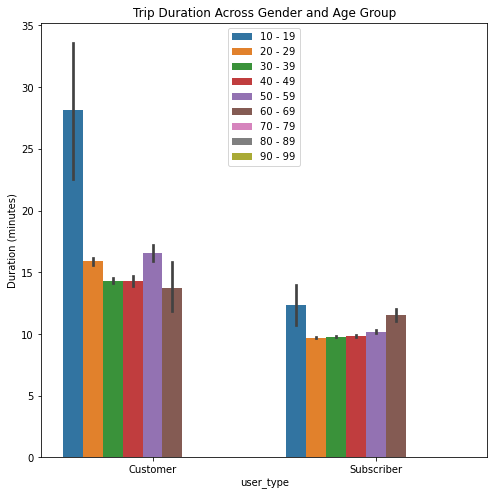

In [121]:
plt.figure(figsize = [8, 8])
ax = sb.barplot(x='user_type', y = 'duration_min', hue='age_group', data=bikes_age.sort_values(by= 'age_group'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('user_type')
plt.ylabel('Duration (minutes)')
leg = ax.legend()

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Across both male and femal within `member_gender`, users between the age of 10 and 19 took trips that lasted longer than the other ages groups. This could be due to many things such as fitness level.

Similarly, across `user_types` the same age group took longer trips. In particular, 10 to 19 year olds who were one off customers took the longest trips. This could be due to the individual using it for recreational purposes or going to school as examples.


#### Were there any interesting or surprising interactions between features?

What suprised me the most was the the older age groups took the position of second longest trip across all three genders. You could assume that those in retirement have more time to spare to take longer trips.
